# 1. Import một số thư viện cần thiết


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf


# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('VNM.csv')

# Chọn cột Price và loại bỏ các giá trị thiếu

df = df[['Price']].dropna().reset_index(drop=True)

#2 Phân chia dữ liệu thành tập huấn luyện, kiểm tra và validation theo tỉ lệ 7:2:1

In [5]:

train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size + test_size]
val_data = df[train_size + test_size:]

# Tiến hành training mô hình AR
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])


#3. tìm số lượng lag phù hợp cho mô hình

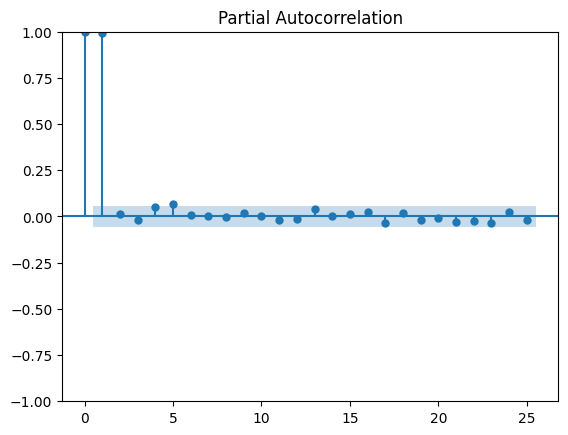

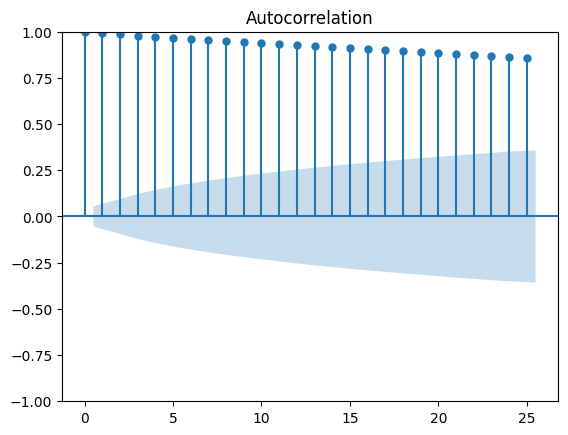

In [6]:
pacf= plot_pacf(df['Price'],lags=25)
acf= plot_acf(df['Price'],lags=25)

#4 Dự đoán giá trong 30 ngày tới

In [9]:
model = AutoReg(y_train, lags=1)   # Lấy lag là 1, tức là mô hình AR(1)
model_fit = model.fit()

# Dự đoán trên tập kiểm tra
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Dự đoán trên tập validation
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val = model_fit.predict(start=len(train_data) + len(test_data), end=len(train_data) + len(test_data) + len(val_data) - 1, dynamic=False)

# Tạo index cho 30 ngày tiếp theo
last_index = df.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

# Dự đoán giá cho 30 ngày tiếp theo
y_next_30_days = model_fit.predict(start=len(df), end=len(df) + 29, dynamic=False)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[82621.540363   82625.75379182 82629.93480066 82634.08363897
 82638.20055428 82642.28579223 82646.33959655 82650.36220911
 82654.3538699  82658.3148171  82662.24528701 82666.14551416
 82670.01573123 82673.85616914 82677.66705702 82681.44862225
 82685.20109044 82688.92468548 82692.61962954 82696.28614306
 82699.92444481 82703.53475185 82707.1172796  82710.67224179
 82714.19985053 82717.7003163  82721.17384793 82724.62065267
 82728.04093617 82731.4349025 ]


#5 Đánh giá độ chính xác thuật toán

In [11]:
# Tính toán các chỉ số đánh giá RMSE, MSE, MAPE

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)
print('Validation RMSE:', val_rmse)
print('Validation MAE:', val_mae)
print('Validation MAPE:', val_mape)

Testing RMSE: 6806.591125959491
Testing MAE: 5413.972197266589
Testing MAPE: 7.554387310199178
Validation RMSE: 12541.820287121687
Validation MAE: 12179.200696543616
Validation MAPE: 17.578443470523418


#6. Vẽ biểu đồ

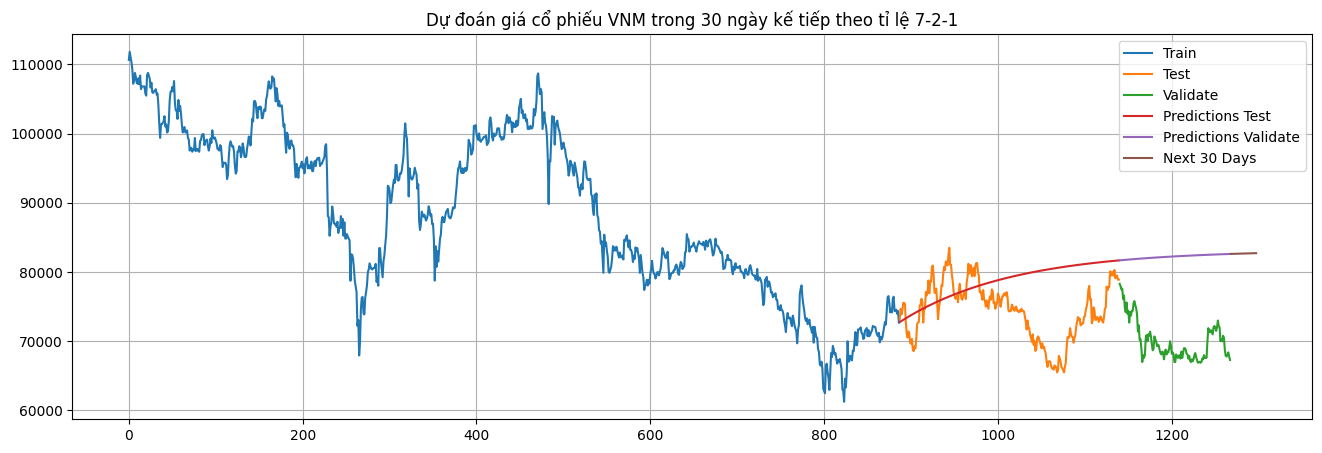

In [12]:
# Vẽ biểu đồ
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu VNM trong 30 ngày kế tiếp theo tỉ lệ 7-2-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(x_next_30_days, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate', 'Next 30 Days'])
plt.show()

#7. Chia tập dữ liệu để train-test-validate theo tỉ lệ 6:3:1



In [19]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size + test_size]
val_data = df[train_size + test_size:]

# Tiến hành training mô hình AR
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

#8. Tìm số lượng lag phù hợp

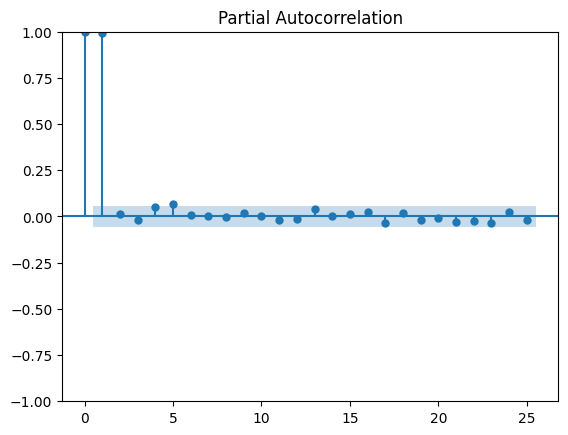

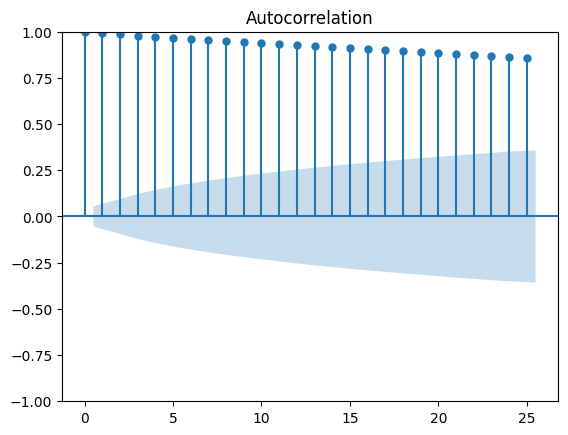

In [20]:
pacf= plot_pacf(df['Price'],lags=25)
acf= plot_acf(df['Price'],lags=25)

#9.Dự đoán trong 30 ngày tới


In [21]:
model = AutoReg(y_train, lags=1)   # Lấy lag là 1, tức là mô hình AR(1)
model_fit = model.fit()

# Dự đoán trên tập kiểm tra
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Dự đoán trên tập validation
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val = model_fit.predict(start=len(train_data) + len(test_data), end=len(train_data) + len(test_data) + len(val_data) - 1, dynamic=False)

# Tạo index cho 30 ngày tiếp theo
last_index = df.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

# Dự đoán giá cho 30 ngày tiếp theo
y_next_30_days = model_fit.predict(start=len(df), end=len(df) + 29, dynamic=False)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[86912.77011918 86913.51313813 86914.24855031 86914.97643362
 86915.69686512 86916.4099211  86917.11567708 86917.81420779
 86918.50558719 86919.1898885  86919.86718419 86920.53754596
 86921.20104482 86921.85775102 86922.5077341  86923.15106289
 86923.78780551 86924.4180294  86925.04180128 86925.65918722
 86926.27025258 86926.87506207 86927.47367975 86928.066169
 86928.65259255 86929.23301252 86929.80749036 86930.3760869
 86930.93886236 86931.49587633]


#10. Đánh giá độ chính xác thuật toán

In [22]:
# Tính toán các chỉ số đánh giá RMSE, MSE, MAPE

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)
print('Validation RMSE:', val_rmse)
print('Validation MAE:', val_mae)
print('Validation MAPE:', val_mape)

Testing RMSE: 11464.975582259718
Testing MAE: 10552.782509488865
Testing MAPE: 14.754511311681076
Validation RMSE: 17024.799434628152
Validation MAE: 16782.4266249937
Validation MAPE: 24.153127709640405


#11. Vẽ biểu đồ

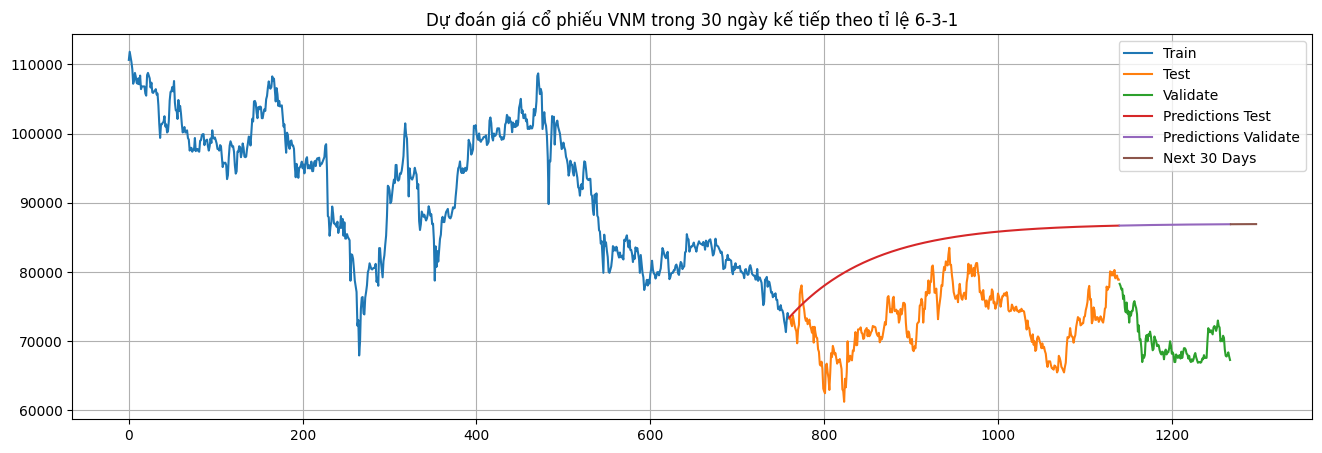

In [24]:
# Vẽ biểu đồ
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu VNM trong 30 ngày kế tiếp theo tỉ lệ 6-3-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(x_next_30_days, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate', 'Next 30 Days'])
plt.show()

#12. Chia tập dữ liệu để train-test-validate theo tỉ lệ 5:3:2

In [25]:
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size + test_size]
val_data = df[train_size + test_size:]

# Tiến hành training mô hình AR
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

#13. Tìm số lượng lag phù hợp

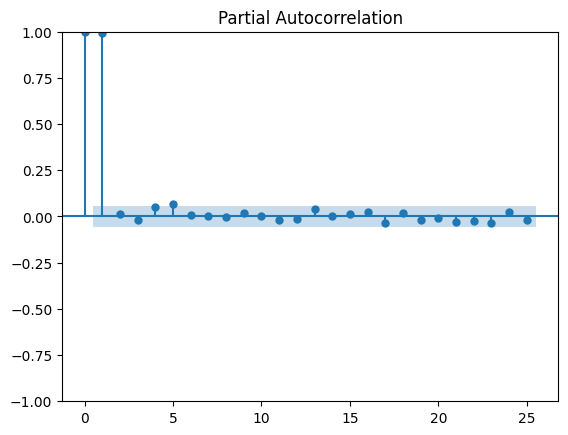

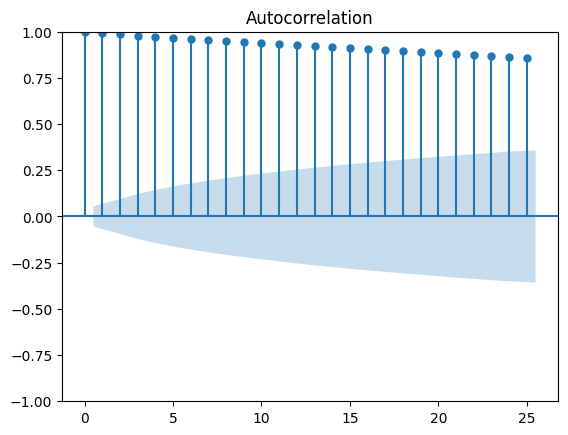

In [26]:
pacf= plot_pacf(df['Price'],lags=25)
acf= plot_acf(df['Price'],lags=25)

#14. Dự đoán 30 ngày tới

In [27]:
model = AutoReg(y_train, lags=1)   # Lấy lag là 1, tức là mô hình AR(1)
model_fit = model.fit()

# Dự đoán trên tập kiểm tra
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Dự đoán trên tập validation
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val = model_fit.predict(start=len(train_data) + len(test_data), end=len(train_data) + len(test_data) + len(val_data) - 1, dynamic=False)

# Tạo index cho 30 ngày tiếp theo
last_index = df.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

# Dự đoán giá cho 30 ngày tiếp theo
y_next_30_days = model_fit.predict(start=len(df), end=len(df) + 29, dynamic=False)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[90580.34600384 90580.36395024 90580.38164215 90580.39908316
 90580.41627685 90580.43322672 90580.44993622 90580.46640877
 90580.48264772 90580.49865639 90580.51443804 90580.52999589
 90580.54533311 90580.56045285 90580.57535816 90580.59005211
 90580.60453769 90580.61881784 90580.63289549 90580.64677351
 90580.66045472 90580.67394192 90580.68723786 90580.70034526
 90580.71326677 90580.72600505 90580.73856269 90580.75094225
 90580.76314625 90580.77517719]


#15. Đánh giá độ chính xác thuật toán

In [28]:
# Tính toán các chỉ số đánh giá RMSE, MSE, MAPE

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)
print('Validation RMSE:', val_rmse)
print('Validation MAE:', val_mae)
print('Validation MAPE:', val_mape)

Testing RMSE: 14672.561661253521
Testing MAE: 13067.637005187202
Testing MAPE: 17.93270557114973
Validation RMSE: 19757.659382439677
Validation MAE: 19432.12842000091
Validation MAPE: 27.629630074104476


#16. Vẽ biểu đồ

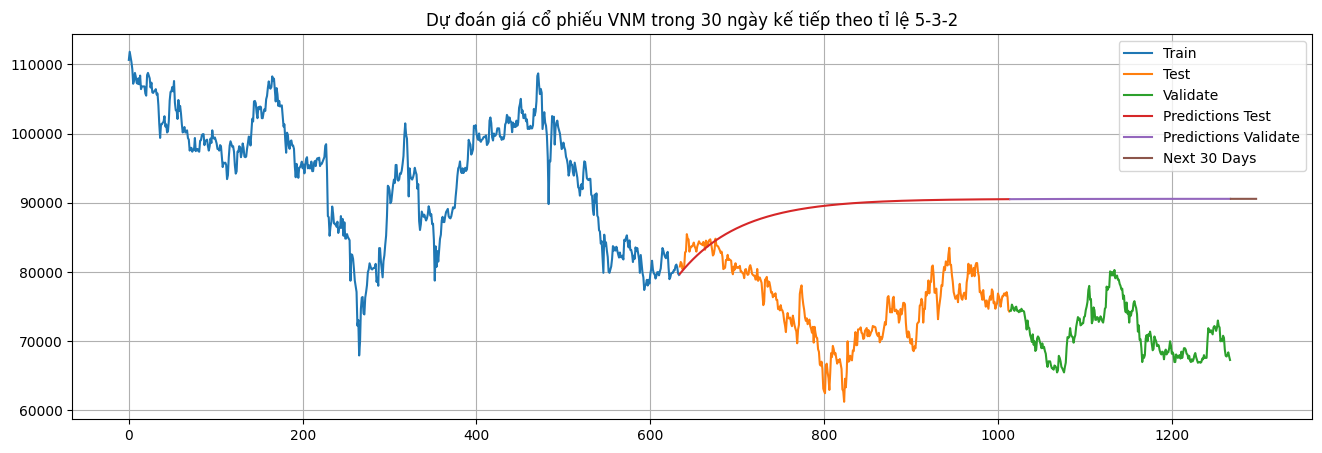

In [30]:
# Vẽ biểu đồ
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu VNM trong 30 ngày kế tiếp theo tỉ lệ 5-3-2")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(x_next_30_days, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate', 'Next 30 Days'])
plt.show()